EDA Heavily inspired by this [article](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

import os

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -q /content/drive/MyDrive/datasets/Tomato.zip

replace Tomato/Tomato_Late_blight/03d8267a-c675-439f-9b98-a9c7653dd05e___GHLB2 Leaf 8558.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y


In [4]:
Tomatos = image_dataset_from_directory(
    'Tomato',
    image_size=(256, 256),
    batch_size=32,
)

Found 4500 files belonging to 3 classes.


In [5]:
type(Tomatos)

tensorflow.python.data.ops.batch_op._BatchDataset

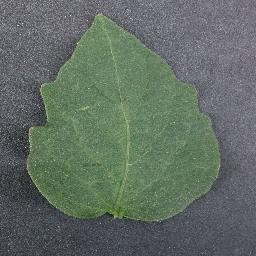

In [6]:
tomato_healthy = load_img('/content/Tomato/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG')

tomato_healthy

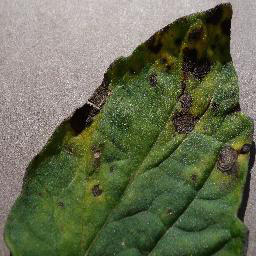

In [7]:
tomato_early_blight = load_img('/content/Tomato/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')

tomato_early_blight

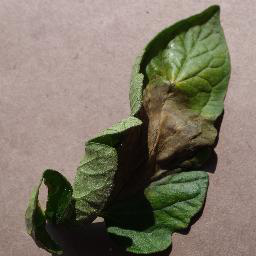

In [8]:
tomato_late_blight = load_img('/content/Tomato/Tomato_Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG')

tomato_late_blight

CHAT-GPT 4 code that we turned into a function

Prompt: "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras"

In [9]:
def avg_images(folder):
  path_to_images = '/content/Tomato/'
  class_name = folder
  batch_size = 32  # Modify this to suit your needs

  datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to [0,1]
  generator = datagen.flow_from_directory(path_to_images,
                                          classes=[class_name],
                                          class_mode=None,
                                          color_mode='rgb',
                                          target_size=(256, 256),
                                          batch_size=batch_size)

  n_samples = generator.samples
  average_image = np.zeros((256, 256, 3))

  for i in range(n_samples // batch_size):  # Integer division to avoid partial batches
      images = next(generator)
      average_image += np.sum(images, axis=0)

  average_image /= n_samples
  return average_image

Found 1591 images belonging to 1 classes.


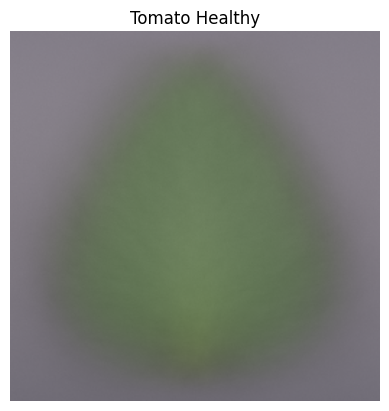

In [10]:
healthy_average_image = avg_images('Tomato_healthy')
plt.title(f'Tomato Healthy')
plt.axis('off')
plt.imshow(healthy_average_image)
plt.savefig('tomato_healthy.png')

Found 1000 images belonging to 1 classes.


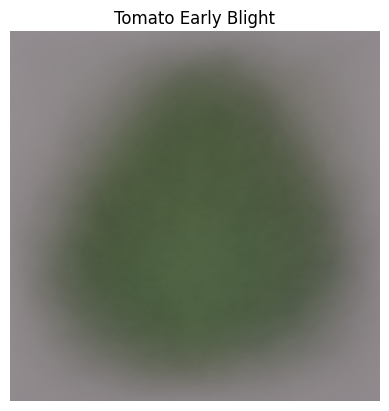

In [11]:
early_blight_average_image = avg_images('Tomato_Early_blight')
plt.title(f'Tomato Early Blight')
plt.axis('off')
plt.imshow(early_blight_average_image)
plt.savefig('tomato_early_blight.png')

Found 1909 images belonging to 1 classes.


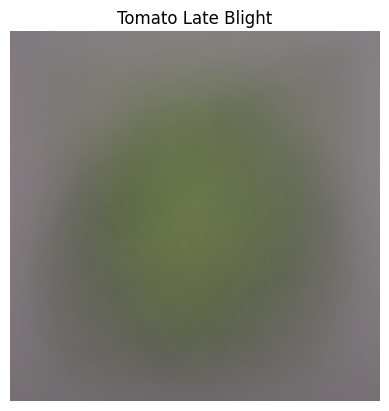

In [12]:
late_blight_average_image = avg_images('Tomato_Late_blight')
plt.title(f'Tomato Late Blight')
plt.axis('off')
plt.imshow(late_blight_average_image)
plt.savefig('tomato_late_blight.png')

Although not immediately obvious there is already a difference that can be obveserved in the averaging of the pixel values of the three different classes. The healthy leaves show a bit more of a lighter green and shine. This could be indicative that healthier leaves reflect light better. The early blight leaves averaged out the darkest. This could be indicative that the loss of health lead to less reflectiveness in the leaves. The dark patches were also lowering the average value as well. The Late Blight, however, averaged out even lighter, but the it still doesn't have as much a reflectiveness to it, and the color value started to shift to yellow, presumably from all the green and brown color values from mixing.

In [13]:
contrast_healthy_early = healthy_average_image - early_blight_average_image
contrast_healthy_late = healthy_average_image - late_blight_average_image
contrast_early_late = early_blight_average_image - late_blight_average_image

In [14]:
contrasts = [contrast_healthy_early, contrast_healthy_late, contrast_early_late]

for contrast in contrasts:
  # rescale to [0, 1]
  contrast -= contrast.min() # subtract minimum 
  contrast /= contrast.max() # divide by new max

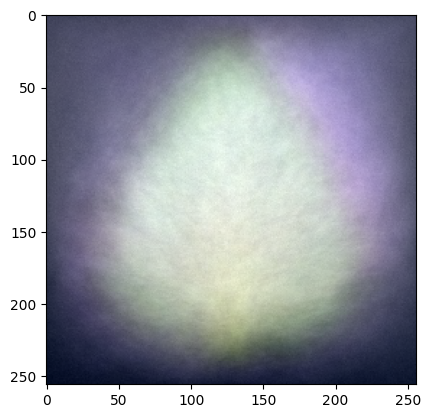

In [15]:
plt.imshow(contrast_healthy_early, cmap='PRGn')
plt.savefig('tomato_contrast_healthy_early.png')

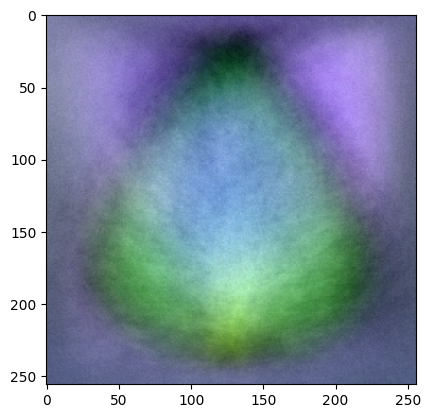

In [16]:
plt.imshow(contrast_healthy_late, cmap='PRGn')
plt.savefig('tomato_contrast_healthy_late.png')

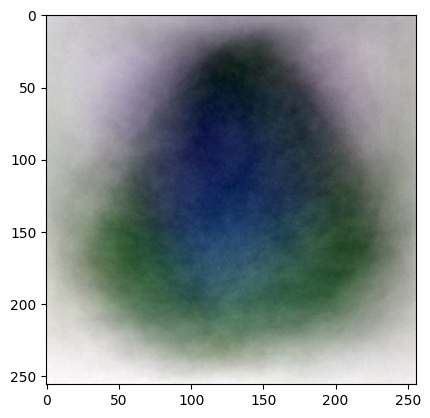

In [17]:
plt.imshow(contrast_early_late, cmap='PRGn')
plt.savefig('tomato_contrast_early_late.png')

In [18]:
def sd_images(folder, average_image):
  path_to_images = '/content/Tomato/'
  class_name = folder
  batch_size = 32  # Modify this to suit your needs

  datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to [0,1]
  generator = datagen.flow_from_directory(path_to_images,
                                          classes=[class_name],
                                          class_mode=None,
                                          color_mode='rgb',
                                          target_size=(256, 256),
                                          batch_size=batch_size)

  n_samples = generator.samples
  standard_deviation_image = np.zeros((256, 256, 3))

  for i in range(n_samples // batch_size):  # Integer division to avoid partial batches
      images = next(generator)
      standard_deviation_image += np.sum((images - average_image) ** 2, axis=0)

  standard_deviation_image /= n_samples - 1
  return np.sqrt(standard_deviation_image)

Found 1591 images belonging to 1 classes.


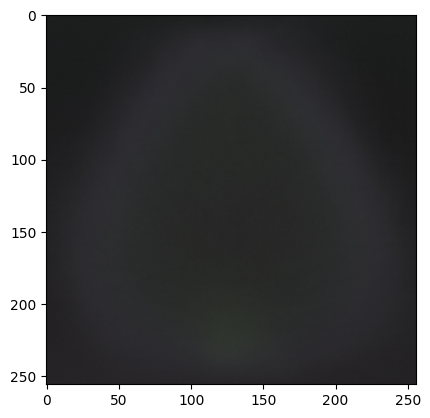

In [19]:
healthy_sd_image = sd_images('Tomato_healthy', healthy_average_image)

plt.imshow(healthy_sd_image)
plt.savefig('tomato_healthy_sd_image.png')

Found 1000 images belonging to 1 classes.


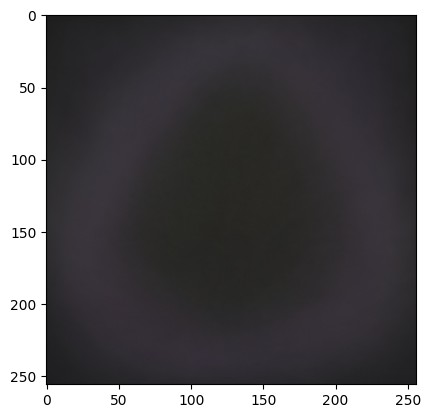

In [20]:
early_blight_sd_image = sd_images('Tomato_Early_blight', early_blight_average_image)

plt.imshow(early_blight_sd_image)
plt.savefig('tomato_early_blight_sd_image.png')

Found 1909 images belonging to 1 classes.


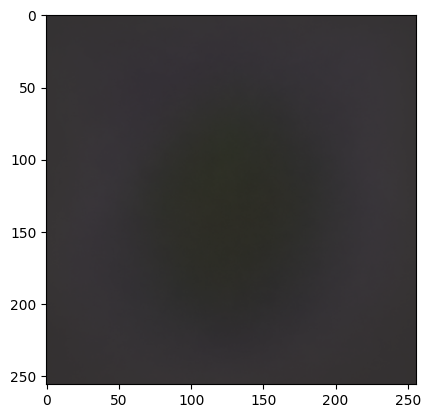

In [21]:
late_blight_sd_image = sd_images('Tomato_Late_blight', late_blight_average_image)

plt.imshow(late_blight_sd_image)
plt.savefig('tomato_late_blight_sd_image.png')

# EigenImage Stuff

Need to write up PCA, reference to article, and CHAT-GPT 4 prompting

In [22]:
# Names of the classes
class_names = ['Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Late_blight']

In [23]:
# Function to load and preprocess data
def load_and_preprocess_data(class_name):
    datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to [0,1]
    generator = datagen.flow_from_directory('/content/Tomato',
                                            classes=[class_name],
                                            class_mode=None,
                                            color_mode='rgb',
                                            target_size=(256, 256),
                                            batch_size=32)
    return generator

In [24]:
# Function to perform PCA on flattened images
def eigenimages(full_mat, n_comp=50):
    pca = PCA(n_components=n_comp, whiten=True)
    pca.fit(np.array(full_mat))
    print('Number of PC: ', pca.n_components_)
    return pca


In [25]:
def plot_pca(pca, class_name, size=(256, 256, 3)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks=[], yticks=[])
        img = pca.components_[i].reshape(size)
        img -= img.min()  # ensure the minimal value is 0.0
        img /= img.max()  # ensure the maximal value is 1.0
        ax.imshow(img)
    plt.suptitle(f'Eigenimages for {class_name.replace("_", " ").title()}')
    plt.axis('off')
    plt.show()
    plt.savefig(f'tomato_eigenimages_for_{class_name}.png')


Found 1591 images belonging to 1 classes.
Number of PC:  50


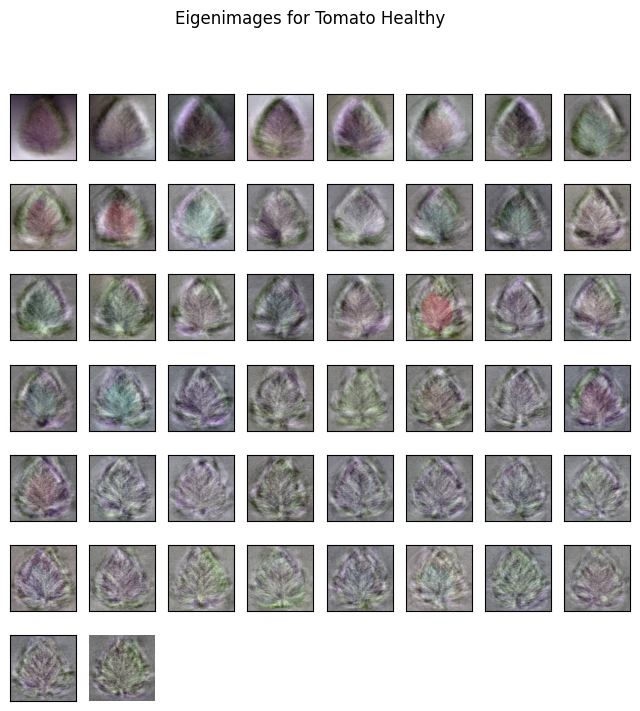

Found 1000 images belonging to 1 classes.
Number of PC:  50


<Figure size 640x480 with 0 Axes>

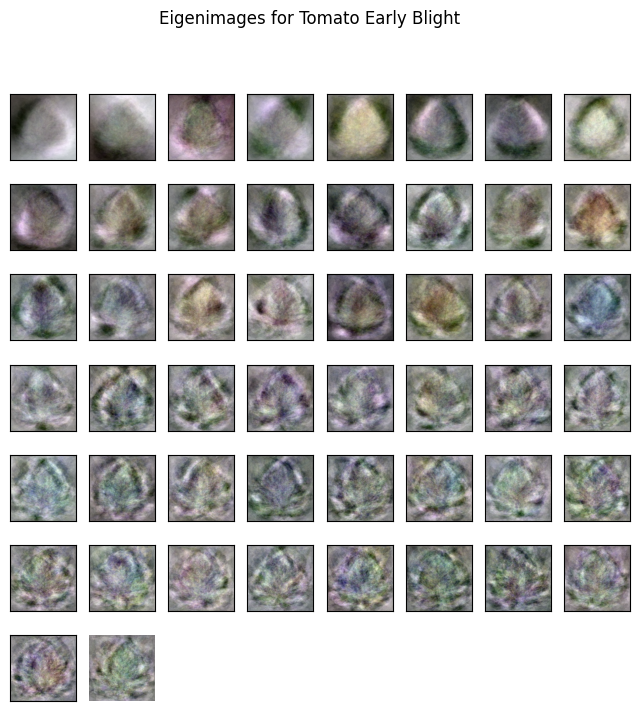

Found 1909 images belonging to 1 classes.
Number of PC:  50


<Figure size 640x480 with 0 Axes>

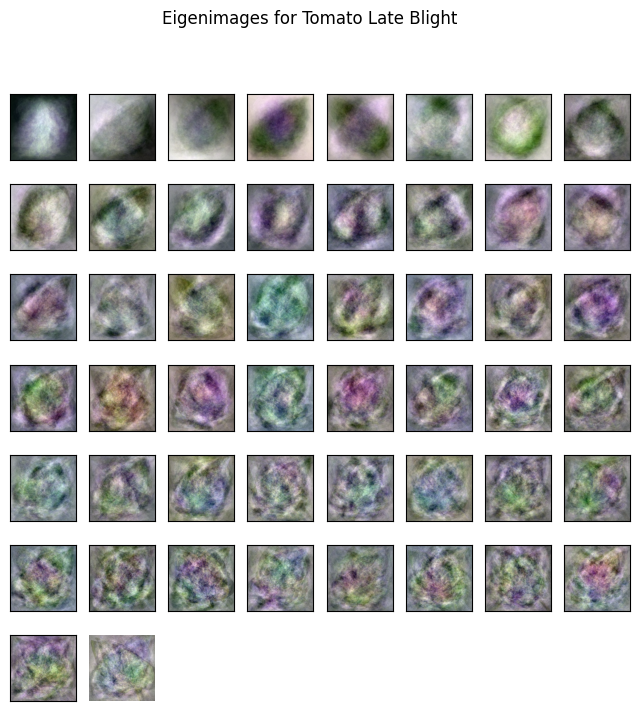

<Figure size 640x480 with 0 Axes>

In [26]:
# Load data, run PCA, and plot eigenimages for each class
for class_name in class_names:
    # Load and preprocess data
    ds = load_and_preprocess_data(class_name)
    
    # Flatten and collect a subset of images for PCA
    image_list = []
    
    # Iterate over the generator
    for i in range(10):  # Adjust this value to take more or fewer batches
        images = next(ds)
        for img in images:
            image_list.append(img.flatten())
    
    # Perform PCA
    pca_model = eigenimages(np.array(image_list))
    
    # Plot eigenimages
    plot_pca(pca_model, class_name)
